# **Module 2 &mdash; k-Nearest Neighbors and Basic ML Notions**

## **2.1 Memory-based Learning<font color='#FFCC00'>  &#x2B24; </font>**

We know that we are often able to understand data via concise 'laws', like Newton's law of gravity. Once we have learned an equation that governs our data, we can then discard all observations and measurement that led to it.

However, it is also clear that our memory plays an important role in our ability to deal with various tasks. For example, when listening to a new rendition of an old song, in order to recognize the song as a cover version, we must be able to recall at least partially the original version. Once recognized, we then 'label' the new version with the title of the original song. Or, we are able to match the singer's voice with our recollection of her voice that we memorized in the past, and then label the new song with her name. And very often we see faces that remind us of someone else - and that very last sentence probably reminds you of the 'super-recognizers' we talked about in the previous module.

We will then attempt to design an ML algorithm that is based on memory. One simple hypothesis is that when we are faced with the classification of a new object, what our brain does is to retrieve from our memory *similar* objects, and to assign a label to the new object that relates in some way to the labels of these retrieved objects.


## **2.2 Distance as a Similarity Measure<font color='#FF5733'> &#x2B24; </font>**

We have discussed that multiple types of objects can be represented as $d$-dimensional vectors. Such representations offer a concrete way to quantify *similarity*, and thus make progress towards converting the above intuition into a memory-based learning algorithm. Clearly two objects should be considered similar if their distance is small, i.e. distance is an inverse measure of similarity.

Consider now two $d$-dimensional points:
$$x = [x_1,\ldots,x_d] \mathrm{~~~and~~~} x' = [x_1',\ldots,x_d']\,.$$

We are all familiar with the Euclidean distance, the length of a straight line segment joining the two points. The Euclidean distance between points $x$ and $x'$ is denoted by $\|x-x'\|_2$ and defined as follows:

$$\|x-x'\|_2 = \sqrt{|x_1-x_1'|^2 + \ldots |x_d-x_d'|^2} = \left(\sum_{i=1}^d |x_i-x_i'|^2\right)^{1/2}.$$

But the notion of distance is, mathematically speaking, much broader. For example, is somehow our space restricts us to move only in directions parallel to the axes, then a better notion of distance is the so-called Manhattan distance which has the following definition:

$$\|x-x'\|_1 = \sum_{i=1}^d |x_i-x_i'| = \left(\sum_{i=1}^d |x_i-x_i'|^1\right)^{1/1}.$$

The Euclidean and Manhattan distances are special cases of the so-called Minkowski $l_p$ distances, defined for every positive number $p$:

$$\|x-x'\|_1 = \left(\sum_{i=1}^d |x_i-x_i'|^p\right)^{1/p}.$$

There are infinitely many ways to define distance, but it is worth noting that any given distance can be further filtered or 'weighed' by another function to give yet more similarity measures. Such functions are known as kernels, and one kernel worth noting here is the Gaussian kernel, defined as follows based on some parameter $\sigma$:

$$ K(x,x') = \exp\,({-\|x-x'\|_2^2}\,/\,2\sigma^2)\,.$$



## **2.3  Teaser: Learned Distances<font color='#FFCC00'> &#x2B24; </font>**

Fixed distance functions are ubiquitous in Data Science, but for many types of data they may not as powerful as we would hope for.



![MNIST dataset illustration](https://docs.google.com/uc?export=download&id=195IiD-hFky4y1GWOVj_CUEJAh5hPmjpr)

For example, we can consider again data vectors that describe images. Moving a digit inside its black frame can create two different images of the same digit whose mathematical distance can be from 0 up to some large number, yet we still perceive them as very similar, or even identical. As we will later see, some advanced ML models can be viewed as algorithms that map the original data set to new points, in a way that renders standard distances more effective. Alternatively, in some sense, ML models can be viewed as algorithms for learning distances.

## **2.4  Nearest Neighbors<font color='#FFCC00'>  &#x2B24; </font>**

Now that we have a measure for similarity, we turn to the memory retrieval task. It seems plausible that when we try to retrieve a memory, our brain does not consider all stored memories, but instead very quickly narrows down to an area of the memory with similar objects/points. This gives rise to the idea of deciding the class of the new point based on $k$ nearest neighbors, for some fixed number $k$.


![Nearest-Neighbors illustration](https://docs.google.com/uc?export=download&id=1LjZ5Ln-NTuD5Od3tkz1MkA-ZcSRe2ciL)

The picture above illustrates this idea. Here, we retrieve the $k=5$ nearest neighbors, and select the label of the majority.

## **2.5  Hyperparameters<font color='#FFCC00'> &#x2B24; </font>**


The main concept behind the k-NN algorithm is simple. We refer to k-NN as 'an algorithm', but like most ML algorithms, k-NN is in some sense a "hyperalgorithm", along with a set of *hyperparameters* whose settings specify the algorithm.

Looking at the above example, we can already see some hyperparameters. The value of $k$ is a hyperparameter, because each value of $k$ gives a different specific algorithm. Also, the type of distance we use when retrieving nearest neighbors is another hyperparameter.

If we reflect further on k-NN, we can also come up with other variants. For example, instead of counting the labels of the nearest neighbors, we can separately sum up the *inverse* distances to points with label A, B, and C, and assign the label that gives the highest sum.

There are other variants one can come up with, each with their own combinations of hyperparameter settings. The same applies to many other ML hyperalgorithms, and covering all of their hyperparameters may be a daunting task. However, if we understand the main concept of the hyperalgorithm and a few of its hyperparameters, then we should be able to read and understand the specifications.

**Note:**  The word "Hyperalgorithm" is not formal terminology. We use it here for the sake of clarifying the notions. From now on, we will revert back to using the word "algorithm" in its general sense.




## **2.6 Testing an ML Algorithm<font color='#FFCC00'> &#x2B24; </font>**

After designing an ML algorithm, we would like to be able to have an idea about how good the algorithm will turn out to be on new unseen data. In order to do that we commonly follow a very natural idea: From the given data set $X$, we put aside a randomly-chosen set of points that we will call the *test set*  $X_{test}$. The rest of the set $X$ will be our *training set* $X_{train}$.

In randomly selecting the test set, we statistically expect that it follows the same distribution that generates all points, and that it can serve as a proxy to it, and to the unseen points.

We will later see that sometimes we split $X$ into three data sets, for training, validation and testing. But for now, a train/test split will suffice for our discussion.

## **2.7 Overfitting, Underfitting, Generalization and Learning Biases<font color='#FFCC00'> &#x2B24; </font>**

As a general rule, the purpose of supervised ML algorithms is to enable us to predict the label of previously unseen points, i.e. points that are not in the available data set $X$. Ideally, a good ML algorithm should make very few mistakes if asked to make predictions on data points from $X$. Because k-NN is based on memory, there is actually a way to make it 100% accurate on points from $X$: just set $k=1$. Then for, every point $\hat{x} \in X$, the 1-NN will be itself, and so the label prediction will be always accurate.

However, by paying too much attention to our data $X$, we increase the chances of making more mistakes on unseen points. This is an instance of what we will call *overfitting*.

![Nearest Neighbors Overfitting](https://docs.google.com/uc?export=download&id=1Lv-uj63NhKoeOKthWGI_T2uu6op2etqj)

Even a single point that is an outlier, or even erroneously labeled can case an entire area of the space to get the wrong label. In this picture all the yellow area would be labeled as 'blue circle'. Intuitively, we can see that this labeling would likely turn out to be wrong.

A larger value for $k$ increases the algorithm's ability to *generalize* to new examples. On the other hand, for a very large value of $k$ the algorithm becomes very insensitive to the data. That is an instance of what we will call *underfitting*.

These different settings for the hyperparameter $k$ can also be viewed as a kind of learning bias. A small $k$ reflects a low bias towards respecting the overall majority, but for larger values of $k$ that bias increases. We will later see how to 'mathematicize' these notions.

The following illustrates underfitting and overfitting in the context of regression, classification, and deep learning.


![Nearest Neighbors Overfitting](https://docs.google.com/uc?export=download&id=1dowG6DKpiBy--SYmoKqYjjyRt7VNCRU4)

(Source: *Kaggle*, [Underfitting *vs* Just Right *vs* Overfitting in Machine Learning](https://www.kaggle.com/discussions/getting-started/166897), Abhishek Shrivastava.)



## **2.8 The k-NN Algorithm: Efficiency Issues<font color='#008DFF'> &#x2B24; </font>**

We now give pseudocode for the k-NN algorithm. The algorithm uses some fixed value for hyperparameter $k$ that has been set externally. It also uses the Euclidean distance for similarity and implements a simple counting of the labels of the nearest neighbors in order to predict a label for the input $\hat{x}$. For simplicity, we also assume that the vector $y$ stores only two possible labels, 0 and 1.


---

*   **function** kNN-predict($X$,$y$, $\hat{x}$)
*   $S$ = [&nbsp;]
*   **for** $j=1$ to $n$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; % here $n$ is the number of rows in $X$.   
*   &nbsp; &nbsp; &nbsp; append to $S$ the distance $\|X^{(j)}-\hat{x}\|_2$
*   $S$, $\mathit{prm}$ = sort($S$) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; % here $prm$ stores the original positions of the elements in $S$.  
*   $c = 0$  
*   **for** $j=1$ to $k$
*   &nbsp; &nbsp; &nbsp; $\mathit{idx}=\mathit{prm}[j]$
*   &nbsp; &nbsp; &nbsp; **if** $y[\mathit{idx}]==1$ **then** $c=c+1$.
*   **if** $c>k/2$ **then return** 1 **else return** 0  

---

As we can see, the basic variant of k-NN has a relatively easy implementation. More code would be needed in order to accommodate additional hyperparameters, but the additions would still be relatively simple.

Taking a careful look at the pseudocode, we see that it computes the distance of $\hat{x}$ from every point in $X$; that is, for each input $\hat{x}$, the algorithm reads the entire memory. That is not what we conceptualized earlier, namely that we should be able to quickly narrow down to the most similar points. For $d$-dimensional point data, this can be achieved with special data structures that pre-process the matrix $X$ only once, but then require only $O(d \log n)$ time to return a prediction for a query point $\hat{x}$, instead of the $O(d n)$ cost of the pseudocode implementation. The pre-processing itself can take time at least $O(d n\log n)$, which can be very expensive for large $d$, making k-NN a somewhat runtime-inefficient algorithm for large-dimensional data. We also know that the algorithm has to always rely on its entire memory, and thus it requires a lot of memory for big datasets.  

While the specifics on the computational complexity of k-NN are not so important, they highlight that, in Machine Learning, we should also sometimes be aware of the computational resources required for running an ML algorithm.


## **2.9 k-NN *scikit-learn* Code<font color='#369870'> &#x2B24; </font>**

We will now see how easy it to use *scikit-learn* in order to apply the k-NN algorithm on a classification dataset. We first import some necessary modules and define a useful function.

In [ ]:
from IPython.display import Image
%matplotlib inline

In [ ]:
# We will use this function throughout the course
# This takes a rectangular area on the 2D plane and discretizes it
# i.e. it makes a grid of lots of points on it
#
# For each such point we run a classifier (e.g. kNN) and record
# the classification output. We use different colors for different
# outputs of the classifier, and then we plot each point in the corresponding color

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'D', 'o', '^', 'v')
    # colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colors = ['#FF0000', '#0000FF', '#90EE90', '#808080', '#00FFFF']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    edgecolor='black',
                    label='test set')

## **2.10  Loading and Processing the Iris dataset<font color='#369870'> &#x2B24; </font>**

Here we load the dataset that is available for experimentation and we select two of its four features, mostly in order to be able to visualize it. We also split the dataset into training and test sets, and we apply a *re-scaling* operation on each of the two attributes, so that both attributes have mean equal to 0 and standard deviation equal to 1. This scaling is very common and we will discus some intuition behind it later in the course.

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [ ]:
#Splitting data into 70% training and 30% test data:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)




In [ ]:
# Scaling the features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined = np.vstack((X_train, X_test))
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [ ]:
# just counting data points

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


## **2.11  Applying k-NN and the Notion of Decision Regions<font color='#369870'> &#x2B24; </font>**

Curiosity Exercise: Use this cell to experiment with hyperparameters of the algorithm.

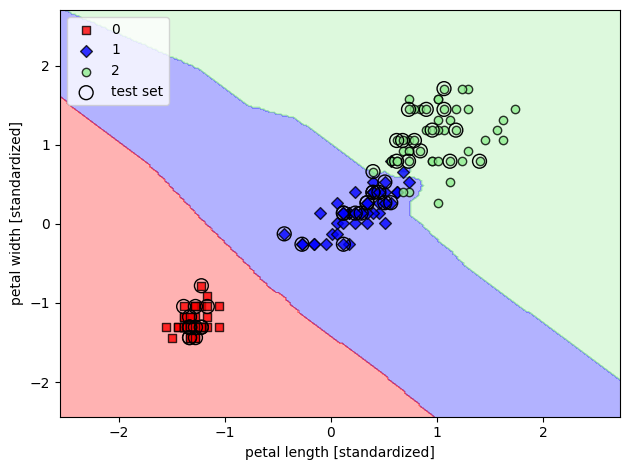

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

## **2.12  The Manual is Your Friend<font color='#369870'> &#x2B24; </font>**

To fully review all options and hyperparameters offered for an algorithm, you should always consult the *scikit-learn* documentation that often contains features we won't have time to cover. For example, here is the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) of kNN.

## **2.12 k-NN as a Regression Algorithm<font color='#FFCC00'>  &#x2B24; </font>**

Several ML algorithms have both classification and regression versions. It is often a nice exercise to start from a classification algorithm and imagine how to convert it into a regression algorithm, or vice versa.

Let's now attempt the exercise in the case of k-NN. As a visual aid, we can use the same picture from before, but we can now imagine that the labels are specific values.

![Nearest-Neighbors illustration](https://docs.google.com/uc?export=download&id=1LjZ5Ln-NTuD5Od3tkz1MkA-ZcSRe2ciL)


For concreteness, assume that we have found the 5 nearest of of $\hat{x}$: $x^{(i_1)},\ldots x^{(i_1)}$, with corresponding values $v_1,\ldots,v_5$.
What can be our prediction for the value of $\hat{x}$?

Following the previous logic, we can consider predicting the value of $\hat{x}$ to be a *weighted* average of the 5 nearby values, according to the distance of $\hat{x}$ from these 5 nearest points.

There are several weighting rules that one can come up with, and a few of them are commonly implemented. To find out the details, the [manual](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) is your friend.
